In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
from pandas.core import series
%matplotlib inline



In [ ]:
btcpath='/content/BTC-USD (6).csv'   #bitcoin dataset
patheth='/content/ETH-USD.csv'       #ehterum dataset
pathltc='/content/LTC-USD (1).csv'   #letcoin dataset
pathxmr='/content/XMR-USD.csv'       #xmr dataset

In [ ]:
btc=pd.read_csv(btcpath)
eth=pd.read_csv(patheth)
ltc=pd.read_csv(pathltc)
xmr=pd.read_csv(pathxmr)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
btc[['Close']]=scaler.fit_transform(btc[['Close']])

In [ ]:
btc['Close']

0       0.003302
1       0.003653
2       0.003984
3       0.005644
4       0.003528
          ...   
2474    0.390716
2475    0.388971
2476    0.390552
2477    0.390542
2478    0.392982
Name: Close, Length: 2479, dtype: float64

In [ ]:
btc[['Open']]=scaler.fit_transform(btc[['Open']])

In [ ]:
x=btc['Open']
y=btc['Close']
from sklearn.model_selection import train_test_split
btcx_train,btcx_test,btcy_train,btcy_test=train_test_split(x,y,test_size=0.2)

In [ ]:
btcy_test

2156    0.234572
170     0.029107
1533    0.876260
2459    0.380893
933     0.136594
          ...   
581     0.094188
1828    0.683950
2302    0.404853
1159    0.124287
1345    0.143613
Name: Close, Length: 496, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 2479 entries, 0 to 2478
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2479 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


<Axes: >

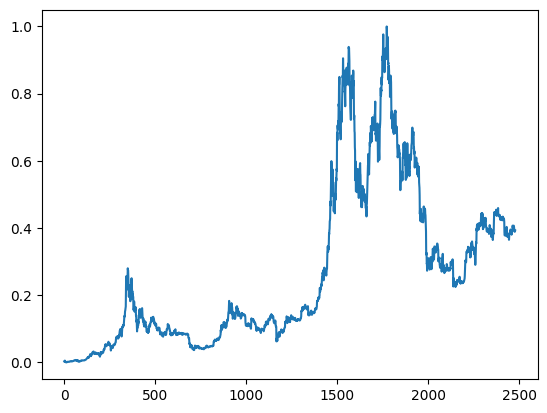

In [ ]:
btc['Close'].info()
btc['Close'].plot()

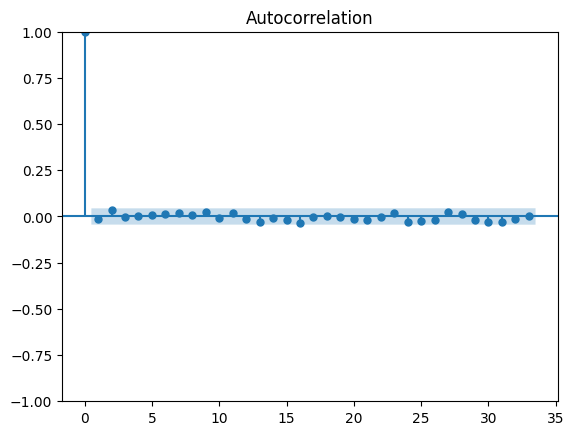

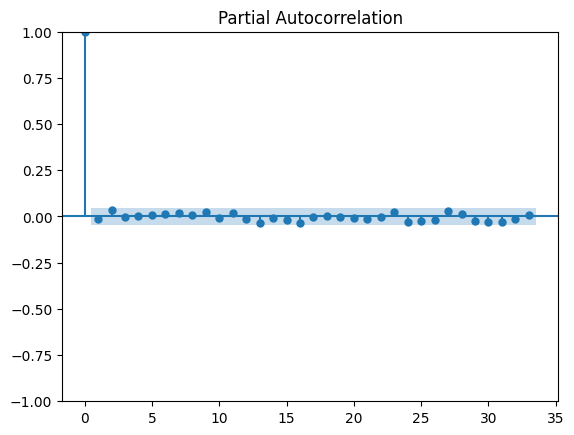

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
acf_original = plot_acf (btcy_train)
pacf_original = plot_pacf(btcy_train)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller( btcy_train )
print ( f'p - value : { adf_test[1]} ')

p - value : 0.0 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_btc = ARIMA(btcy_train, order=(2,1,0))
model_fit_btc=model_btc.fit()
print(model_fit_btc.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1983
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -262.487
Date:                Sun, 05 May 2024   AIC                            530.974
Time:                        15:09:23   BIC                            547.750
Sample:                             0   HQIC                           537.137
                               - 1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6893      0.021    -32.260      0.000      -0.731      -0.647
ar.L2         -0.3187      0.021    -14.854      0.000      -0.361      -0.277
sigma2         0.0763      0.002     31.765      0.0

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima( btcx_train , stepwise = False , seasonal = False )
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1983
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -138.902
Date:                Sun, 05 May 2024   AIC                            289.804
Time:                        15:10:28   BIC                            323.358
Sample:                             0   HQIC                           302.130
                               - 1983                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1542      0.023      6.714      0.000       0.109       0.199
ar.L2          0.2031      0.022      9.117      0.000       0.159       0.247
ar.L3          0.1587      0.024      6.694      0.000       0.112       0.205
ar.L4          0.1723      0.022      7.777      0.000       0.129       0.216
ar.L5          0.1755      0.023      7.737      0.000       0.131       0.220
sigma2         0.0673      0.002     31.397      0.000       0.063       0.072
===================================================================================
Ljung-Box (L1) (Q):                   4.60   Jarque-Bera (JB):               213.48
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.80
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
btcy_pred = auto_arima.predict(len(btcx_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
btcy_pred

1983    2.759744e-01
1984    2.947620e-01
1985    2.514657e-01
1986    2.814500e-01
1987    2.298389e-01
            ...     
2474    1.869859e-11
2475    1.782542e-11
2476    1.699304e-11
2477    1.619952e-11
2478    1.544305e-11
Length: 496, dtype: float64

In [ ]:
#btc
#mean_absolute_error
from sklearn.metrics import mean_absolute_error
print('MAE =',mean_absolute_error(btcy_test,btcy_pred))

MAE = 0.25512094319908524


In [ ]:
#mean_absolute_percentage_error
from  sklearn.metrics  import  mean_absolute_percentage_error
print ( 'MAPE =' ,mean_absolute_percentage_error(btcy_test,btcy_pred))

MAPE = 1.0185102079508772


In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(btcy_test,btcy_pred))

MSE= 0.12141757125186008


In [ ]:
#root mean Squared error
print('RMSE=',np.sqrt(mean_squared_error(btcy_test,btcy_pred)))

RMSE= 0.34845024214636455


# **Ethereum....**

In [ ]:
eth[['Close']]=scaler.fit_transform(eth[['Close']])

In [ ]:
eth['Close']

0       0.080848
1       0.080194
2       0.080703
3       0.081623
4       0.080159
          ...   
2140    0.313455
2141    0.307820
2142    0.310459
2143    0.311129
2144    0.312142
Name: Close, Length: 2145, dtype: float64

In [ ]:
eth[['Open']]=scaler.fit_transform(eth[['Open']])

In [ ]:
x2=eth['Open']
y2=eth['Close']
from sklearn.model_selection import train_test_split
ethx_train,ethx_test,ethy_train,ethy_test=train_test_split(x2,y2,test_size=0.2)

In [ ]:
ethy_test

1475    0.832120
433     0.004278
125     0.063227
2106    0.330661
500     0.016343
          ...   
1927    0.318540
745     0.010429
1182    0.294302
477     0.011407
7       0.078625
Name: Close, Length: 429, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 2145 entries, 0 to 2144
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2145 non-null   float64
dtypes: float64(1)
memory usage: 16.9 KB


<Axes: >

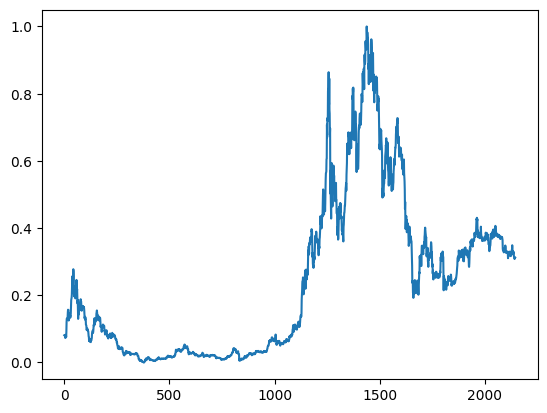

In [ ]:
eth['Close'].info()
eth['Close'].plot()

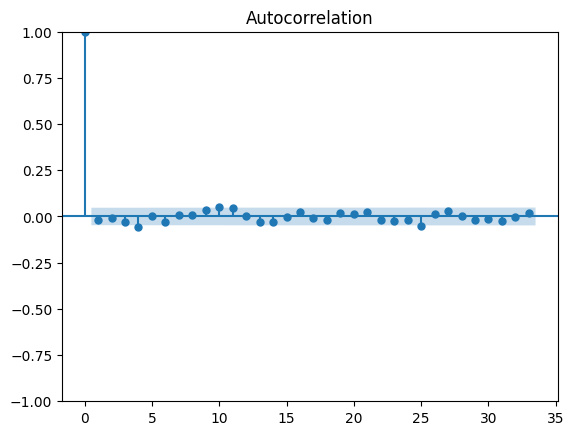

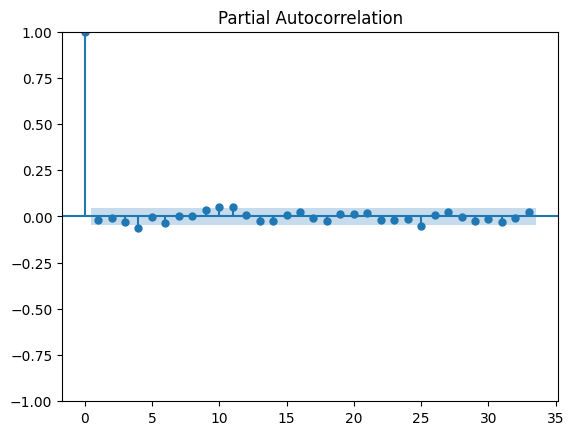

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
acf_original = plot_acf (ethy_train)
pacf_original = plot_pacf(ethy_train)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller( ethy_train )
print ( f'p - value : { adf_test[1]} ')

p - value : 0.0 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_eth = ARIMA(ethy_train, order=(2,1,0))
model_fit_eth=model_eth.fit()
print(model_fit_eth.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1716
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -239.320
Date:                Sun, 05 May 2024   AIC                            484.640
Time:                        15:10:30   BIC                            500.982
Sample:                             0   HQIC                           490.687
                               - 1716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6694      0.023    -29.438      0.000      -0.714      -0.625
ar.L2         -0.3213      0.023    -13.910      0.000      -0.367      -0.276
sigma2         0.0774      0.003     30.518      0.0

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima( ethx_train , stepwise = False , seasonal = False )
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1716
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -130.624
Date:                Sun, 05 May 2024   AIC                            273.248
Time:                        15:11:33   BIC                            305.935
Sample:                             0   HQIC                           285.343
                               - 1716                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1735      0.024      7.103      0.000       0.126       0.221
ar.L2          0.1788      0.025      7.108      0.000       0.129       0.228
ar.L3          0.1553      0.026      6.035      0.000       0.105       0.206
ar.L4          0.1330      0.025      5.241      0.000       0.083       0.183
ar.L5          0.1913      0.024      7.925      0.000       0.144       0.239
sigma2         0.0681      0.002     29.503      0.000       0.064       0.073
===================================================================================
Ljung-Box (L1) (Q):                   4.71   Jarque-Bera (JB):               197.55
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.83
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ethy_pred = auto_arima.predict(len(ethx_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
ethy_pred

1716    3.251696e-01
1717    1.996122e-01
1718    2.245248e-01
1719    2.356380e-01
1720    2.140285e-01
            ...     
2140    2.067581e-12
2141    1.946506e-12
2142    1.832522e-12
2143    1.725212e-12
2144    1.624186e-12
Length: 429, dtype: float64

In [ ]:
#eth
#mean_absolute_error
from sklearn.metrics import mean_absolute_error
print('MAE =',mean_absolute_error(ethy_test,ethy_pred))

MAE = 0.22286476667587124


In [ ]:
#mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE =',mean_absolute_percentage_error(ethy_test,ethy_pred))

MAPE = 1.229329275538584


In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(ethy_test,ethy_pred))

MSE= 0.10396342701927495


In [ ]:
#root mean Squared error
print('RMSE=',np.sqrt(mean_squared_error(ethy_test,ethy_pred)))

RMSE= 0.3224336009464196


# **Letcoin....**

In [ ]:
ltc[['Close']]=scaler.fit_transform(ltc[['Close']])

In [ ]:
ltc['Close']

0       0.009157
1       0.008229
2       0.008122
3       0.008017
4       0.008008
          ...   
3310    0.156615
3311    0.155650
3312    0.156808
3313    0.157044
3314    0.157297
Name: Close, Length: 3315, dtype: float64

In [ ]:
ltc[['Open']]=scaler.fit_transform(ltc[['Open']])

In [ ]:
x3=ltc['Open']
y3=ltc['Close']
from sklearn.model_selection import train_test_split
ltcx_train,ltcx_test,ltcy_train,ltcy_test=train_test_split(x3,y3,test_size=0.2)

In [ ]:
ltcy_test

980     0.074601
3206    0.217026
95      0.004487
997     0.083207
3008    0.197739
          ...   
1042    0.106601
204     0.000960
1849    0.143111
1256    0.569223
2197    0.108750
Name: Close, Length: 663, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 3315 entries, 0 to 3314
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3315 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB


<Axes: >

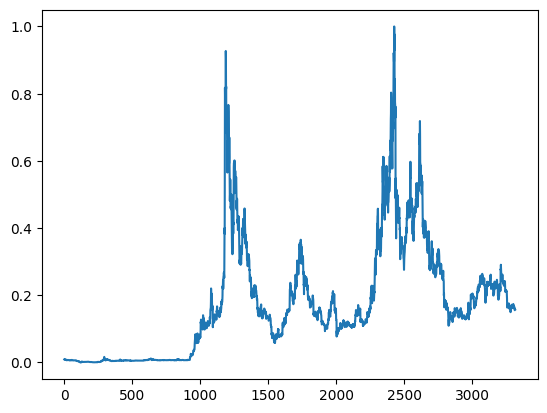

In [ ]:
ltc['Close'].info()
ltc['Close'].plot()

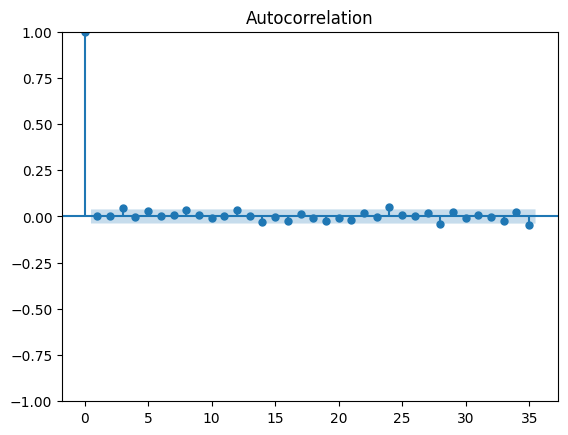

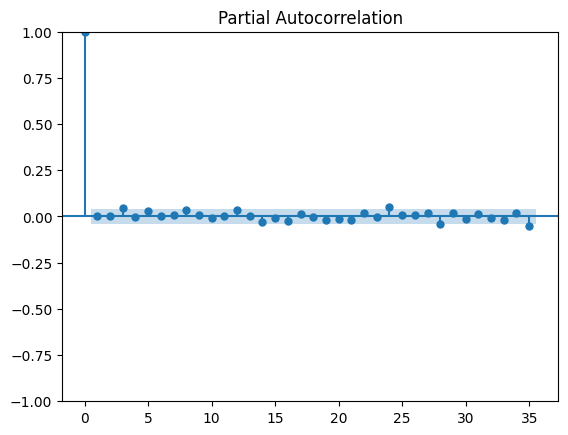

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
acf_original = plot_acf (ltcy_train)
pacf_original = plot_pacf(ltcy_train)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller( ltcy_train )
print ( f'p - value : { adf_test[1]} ')

p - value : 0.0 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ltc = ARIMA(ltcy_train, order=(2,1,0))
model_fit_ltc=model_ltc.fit()
print(model_fit_ltc.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2652
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 658.930
Date:                Sun, 05 May 2024   AIC                          -1311.859
Time:                        15:11:34   BIC                          -1294.211
Sample:                             0   HQIC                         -1305.471
                               - 2652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6813      0.017    -40.168      0.000      -0.715      -0.648
ar.L2         -0.3610      0.016    -22.202      0.000      -0.393      -0.329
sigma2         0.0356      0.001     44.365      0.0

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima( ltcx_train , stepwise = False , seasonal = False )
auto_arima

ARIMA(order=(1, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2652
Model:               SARIMAX(1, 0, 4)   Log Likelihood                 989.570
Date:                Sun, 05 May 2024   AIC                          -1967.140
Time:                        15:12:48   BIC                          -1931.841
Sample:                             0   HQIC                         -1954.363
                               - 2652                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.001    952.412      0.000       0.996       1.000
ma.L1         -1.0065      0.021    -48.627      0.000      -1.047      -0.966
ma.L2          0.0106      0.029      0.369      0.712      -0.046       0.067
ma.L3          0.0770      0.028      2.748      0.006       0.022       0.132
ma.L4         -0.0474      0.019     -2.518      0.012      -0.084      -0.010
sigma2         0.0289      0.001     37.779      0.000       0.027       0.030
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):              1051.35
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ltcy_pred = auto_arima.predict(len(ltcx_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
ltcy_pred

2652    0.145054
2653    0.145569
2654    0.137104
2655    0.142542
2656    0.142273
          ...   
3310    0.041483
3311    0.041405
3312    0.041327
3313    0.041249
3314    0.041172
Length: 663, dtype: float64

In [ ]:
#ltc
#mean_absolute_error
from sklearn.metrics import mean_absolute_error
print('MAE =',mean_absolute_error(ltcy_test,ltcy_pred))

MAE = 0.14180652652128814


In [ ]:
#mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE =',mean_absolute_percentage_error(ltcy_test,ltcy_pred))

MAPE = 6.736033033589333


In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(ltcy_test,ltcy_pred))

MSE= 0.041073855196085224


In [ ]:
#root mean Squared error
print('RMSE=',np.sqrt(mean_squared_error(ltcy_test,ltcy_pred)))

RMSE= 0.20266685766569043


# **XMR...**

In [ ]:
xmr[['Close']]=scaler.fit_transform(xmr[['Close']])

In [ ]:
xmr['Close']

0       0.161074
1       0.192212
2       0.201622
3       0.200615
4       0.198287
          ...   
2161    0.268173
2162    0.264844
2163    0.267615
2164    0.265934
2165    0.265928
Name: Close, Length: 2166, dtype: float64

In [ ]:
xmr[['Open']]=scaler.fit_transform(xmr[['Open']])

In [ ]:
x4=xmr['Open']
y4=xmr['Close']
from sklearn.model_selection import train_test_split
xmrx_train,xmrx_test,xmry_train,xmry_test=train_test_split(x4,y4,test_size=0.2)

In [ ]:
xmry_test

761     0.044516
635     0.143097
2162    0.264844
1175    0.228590
685     0.054517
          ...   
1252    0.690751
888     0.052987
726     0.069242
1546    0.252179
222     0.198717
Name: Close, Length: 434, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 2166 entries, 0 to 2165
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2166 non-null   float64
dtypes: float64(1)
memory usage: 17.0 KB


<Axes: >

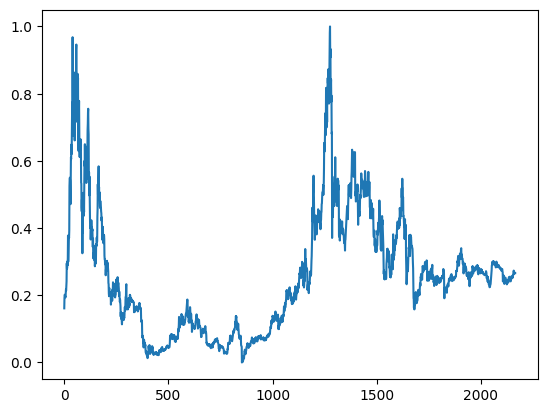

In [ ]:
xmr['Close'].info()
xmr['Close'].plot()

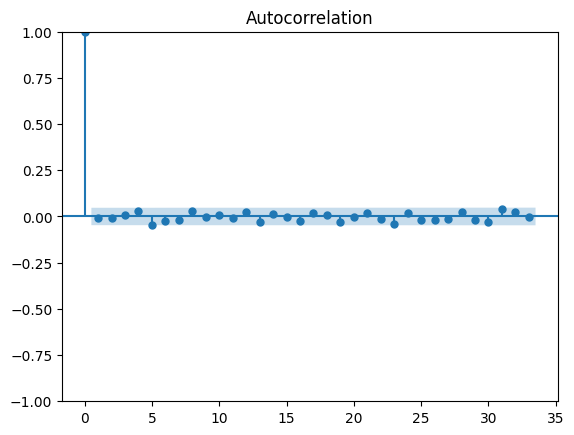

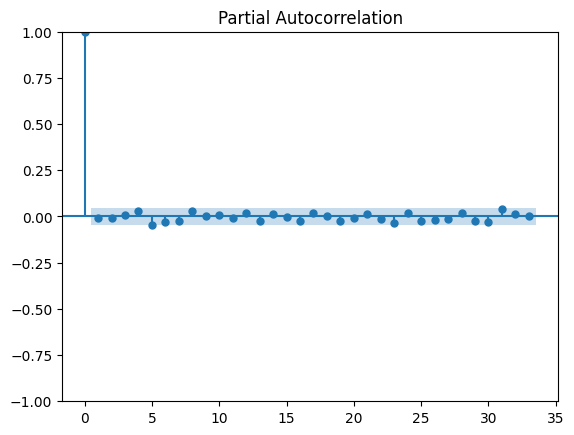

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
acf_original = plot_acf (xmry_train)
pacf_original = plot_pacf(xmry_train)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller( xmry_train )
print ( f'p - value : { adf_test[1]} ')

p - value : 0.0 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_xmr = ARIMA(xmry_train, order=(2,1,0))
model_fit_xmr=model_xmr.fit()
print(model_fit_xmr.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1732
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 233.161
Date:                Sun, 05 May 2024   AIC                           -460.323
Time:                        15:12:51   BIC                           -443.953
Sample:                             0   HQIC                          -454.268
                               - 1732                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6735      0.022    -31.101      0.000      -0.716      -0.631
ar.L2         -0.3442      0.023    -15.138      0.000      -0.389      -0.300
sigma2         0.0447      0.001     33.318      0.0

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima( xmrx_train , stepwise = False , seasonal = False )
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1732
Model:               SARIMAX(5, 0, 0)   Log Likelihood                 329.202
Date:                Sun, 05 May 2024   AIC                           -646.404
Time:                        15:13:58   BIC                           -613.662
Sample:                             0   HQIC                          -634.294
                               - 1732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1823      0.024      7.546      0.000       0.135       0.230
ar.L2          0.1844      0.024      7.582      0.000       0.137       0.232
ar.L3          0.1970      0.024      8.065      0.000       0.149       0.245
ar.L4          0.2100      0.023      9.191      0.000       0.165       0.255
ar.L5          0.1329      0.024      5.640      0.000       0.087       0.179
sigma2         0.0400      0.001     34.406      0.000       0.038       0.042
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):               232.95
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.78
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
xmry_pred = auto_arima.predict(len(xmrx_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
xmry_pred

1732    2.199850e-01
1733    2.554325e-01
1734    2.678724e-01
1735    2.569377e-01
1736    2.475268e-01
            ...     
2161    1.784685e-07
2162    1.726343e-07
2163    1.669907e-07
2164    1.615317e-07
2165    1.562511e-07
Length: 434, dtype: float64

In [ ]:
#xmr
#mean_absolute_error
from sklearn.metrics import mean_absolute_error
print('MAE =',mean_absolute_error(xmry_test,xmry_pred))

MAE = 0.24575725463369205


In [ ]:
#mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE =',mean_absolute_percentage_error(xmry_test,xmry_pred))

MAPE = 0.9504273649264481


In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(xmry_test,xmry_pred))

MSE= 0.08987913549383762


In [ ]:
#root mean Squared error
print('RMSE=',np.sqrt(mean_squared_error(xmry_test,xmry_pred)))

RMSE= 0.29979849148025683
